<a href="https://colab.research.google.com/github/mohsenahmadi2003/MLP/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
from torch import nn

single neuron

In [47]:
fc = nn.Linear(in_features=5, out_features=1)

In [48]:
fc.bias

Parameter containing:
tensor([-0.2721], requires_grad=True)

In [49]:
fc.weight

Parameter containing:
tensor([[ 0.1869,  0.1638, -0.4059, -0.2889,  0.1649]], requires_grad=True)

In [50]:
x = torch.randn(10,5)
x

tensor([[ 0.8588, -1.0672, -0.4249, -0.5189, -1.2266],
        [ 0.6125, -0.8781,  1.0302,  0.7002, -0.7040],
        [-0.0521,  0.5690, -1.9165, -2.3795,  2.1319],
        [ 0.7334, -0.1006, -0.0430,  0.1188,  1.8778],
        [ 0.0685, -0.3393, -0.4111, -0.0094,  0.3700],
        [-0.4164,  1.4965, -1.3482,  0.0265,  0.1507],
        [-0.0540, -0.9582,  1.7640,  1.3105, -0.8814],
        [-1.0475,  1.2799, -0.0636, -0.2610,  0.4952],
        [ 0.0997, -0.8739, -2.0762,  0.2636,  1.9849],
        [ 2.3102, -0.7061,  1.0935,  0.9841, -0.7344]])

In [51]:
fc(x)

tensor([[-0.1664],
        [-1.0380],
        [ 1.6284],
        [ 0.1413],
        [-0.0843],
        [ 0.4597],
        [-1.6792],
        [-0.0753],
        [ 0.6972],
        [-0.8053]], grad_fn=<AddmmBackward0>)

fully connected layer (perceptron layer)

In [52]:
fc = nn.Linear(4, 5, bias=True)

In [53]:
x = torch.tensor([[94., 69, 33, 42],
                  [66, 72, 21, 99],
                  [98, 59, 54, 38],
                  [60, 86, 37, 21],
                  [29, 65, 41, 78],
                  [56,  5, 99, 11]])

In [54]:
fc(x)

tensor([[-46.1175,  15.1475,  40.3221,  -1.9077, -39.3606],
        [-61.8877,  27.2607,  14.7902, -41.0634, -40.1804],
        [-33.5731,   3.7883,  32.4587,   8.8620, -32.6033],
        [-39.3248,  10.9769,  37.0794, -15.9460, -43.4775],
        [-38.3197,  10.8602,  -3.9737, -43.3577, -30.7650],
        [ 21.8638, -34.7148, -12.1585,  31.6257,   2.6151]],
       grad_fn=<AddmmBackward0>)

In [55]:
fc.weight

Parameter containing:
tensor([[-0.1967, -0.4183,  0.3841, -0.2704],
        [ 0.0854,  0.2153, -0.4254,  0.1536],
        [ 0.4359,  0.3602, -0.3481, -0.3260],
        [ 0.4531, -0.4601,  0.1287, -0.4130],
        [-0.0969, -0.4786,  0.1097, -0.0137]], requires_grad=True)

In [56]:
x = torch.tensor([[  6.,   9,   5],
                  [ -1,  -10,   5],
                  [  2,   -1,  -9],
                  [  3,    1,   1]])

In [57]:
fc1 = nn.Linear(3, 8)
fc2 = nn.Linear(8, 5, bias=False)

In [58]:
fc2(fc1(x)).shape

torch.Size([4, 5])

In [59]:
mlp = nn.Sequential(nn.Linear(3, 8),
                    nn.Linear(8 ,5))
mlp

mlp[0]
mlp[1]

Linear(in_features=8, out_features=5, bias=True)

In [60]:
mlp(x)

tensor([[-1.7723,  1.1563,  0.6370,  1.4099, -0.1954],
        [ 2.6165, -1.9494,  0.0807,  2.2998, -0.6443],
        [-0.4830,  0.7160, -1.7017, -0.8216,  2.1418],
        [-0.2185,  0.1937, -0.1847,  1.0252,  0.3544]],
       grad_fn=<AddmmBackward0>)

Train Neural Network

load data

In [83]:
import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [62]:
df = pd.read_csv('/content/mlp/train.csv')
df.head()


,Unnamed: 0,x,y
0,0,0.771270,2.474538
1,1,0.063558,1.192772
2,2,0.863103,2.912784
3,3,0.025419,1.078507
4,4,0.731994,2.473164


In [63]:
x_train = torch.tensor(df['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df['y'].values, dtype=torch.float32)

In [64]:
data_frame_test = pd.read_csv("/content/mlp/test.csv")
data_frame_test.head()

,Unnamed: 0,x,y
0,0,0.304614,1.615251
1,1,0.155995,1.347700
2,2,0.662522,2.234106
3,3,0.107891,1.298501
4,4,0.909320,2.893834


In [65]:
x_test = torch.FloatTensor(data_frame_test['x'].values).unsqueeze(1)
y_test = torch.FloatTensor(data_frame_test['y'].values)

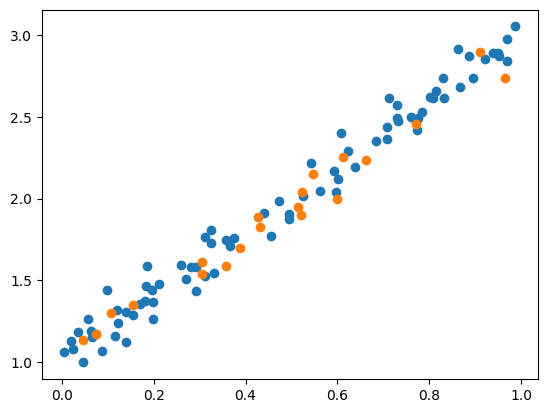

In [66]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

build the nn model

In [67]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [68]:
loss_function = nn.MSELoss()

define optimization

In [95]:
optimizer = optim.SGD(model.parameters()
, lr=0.1) # lr = learning rate

train

In [ ]:
N = 500
loss_hist = []

for iter in range(N):
  yp = model(x_train)
  loss = loss_function(yp.squeeze(), y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  loss_hist.append(loss.item())
  print(loss.item())

In [ ]:
x_viz = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
y_viz = model(x_viz)
plt.scatter(x_train, y_train)
plt.plot(x_viz.detach(), y_viz.detach(), 'r')

In [99]:
yp = model(x_test)
F.l1_loss(yp.squeeze(), y_test)

<ipython-input-99-ba6bfb77b91a>:2: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  F.l1_loss(yp, y_test)


tensor(0.3809, grad_fn=<MeanBackward0>)

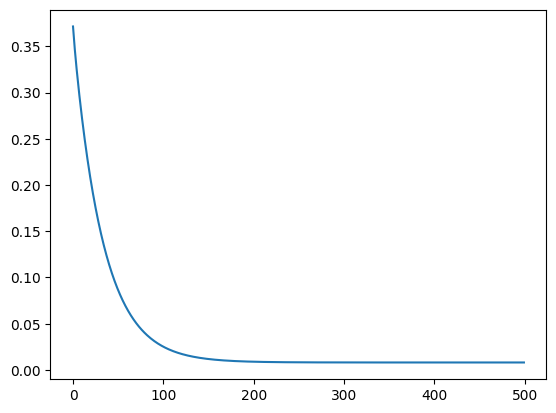

In [102]:
plt.plot(range(N), loss_hist)